In [1]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import scipy.misc
import PIL

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def is_background(colno):
    row,col=mat.shape
    for i in range(0,row):
        if mat[i][colno]<0.9:
            return False
    return True

In [3]:
def get_matrix(col_no):
    matrix=[]
    row,col=mat.shape
    for i in range(col_no,col):
        if is_background(i)==False:
            z=mat[:,i]
            matrix.append(z)
        else:
            break
    matrix=np.matrix(matrix)
    matrix=np.transpose(matrix)
    pyplot.imshow(matrix,cmap=cm.gray)
    pyplot.show()
    image_arr.append(matrix.tolist())
    return i

In [4]:
def get_char_img():
    row,col=mat.shape
    col_no=0
    curr_col=0
    while True:
        for i in range(curr_col,col):
            found=is_background(i)
            if found==False:
                col_no=i
                break
        if i==col-1:
            break
        else:
            curr_col=get_matrix(col_no)
        

In [22]:
def process_image():
    img=scipy.misc.imread('conv.png')
    img=img[:,:,0]
    img=img/255.0
    pyplot.imshow(img,cmap=cm.gray)
    pyplot.show()
    return img

# SEGMENTED IMAGE PADDING FUNCTION

In [23]:
def pad_image_and_resize(image):
    image_crop=get_cropped_image(image)
    baseheight = 20
    scipy.misc.imsave('temp.jpg', np.matrix(image_crop))
    img=Image.open('temp.jpg')
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)
    
    #pyplot.imshow(np.matrix(img),cmap=cm.gray)
    #pyplot.show()
    return img
    

In [70]:
def get_cropped_image(image):
    new_img=[]
    for i in image:
        x=True
        for j in i:
            if j<0.5:
                x=False
                break
        if x==False:
            new_img.append(i)
    image=np.matrix(new_img)
    
    row,col=image.shape
    image=image.tolist()
    for i in range(row):
        for j in range(10):
            image[i].insert(0,1)
        for j in range(10):
            image[i].append(1)
    row=len(image)
    col=len(image[0])
    
    for j in range(10):
        image.append([1.0 for i in range(col)])
    for j in range(10):
        image.insert(0,[1.0 for i in range(col)])
    row=len(image)
    col=len(image[0])
    if row>col:
        diff=row-col
        front=int(diff/2)
        back=diff-front
        for i in range(row):
            for j in range(back):
                image[i].append(1)
            for j in range(front):
                image[i].insert(0,1)
            
    return image
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


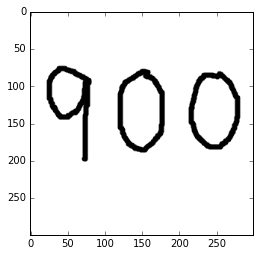

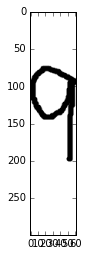

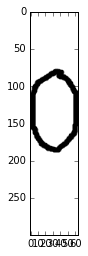

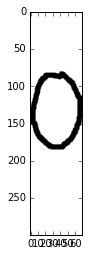

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


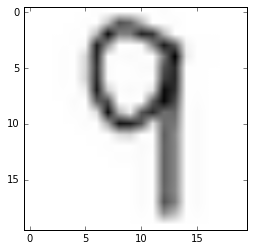

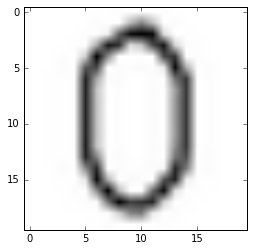

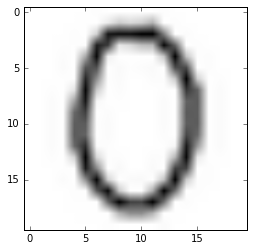

In [80]:
img=process_image()
image_arr=[]
mat=img
get_char_img()
arr=[]
for i in range(len(image_arr)):
    arr.append(pad_image_and_resize(image_arr[i]))

In [75]:
tf.reset_default_graph()
convnet=input_data(shape=[None,20,20,1],name='input')
convnet=conv_2d(convnet,32,2,activation='relu')
convnet=max_pool_2d(convnet,2)
convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,256,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)

convnet=fully_connected(convnet,10,activation='softmax')

convnet=regression(convnet,optimizer='adam',learning_rate=0.002,loss='categorical_crossentropy',name='regression')

model=tflearn.DNN(convnet,tensorboard_verbose=0)


In [76]:
model.load("cnn_model.tfl")

INFO:tensorflow:Restoring parameters from /home/sparsha/gitprojects/Handwritten number recognition/cnn_model.tfl


900
